# Atividade 01

## Importações e Configuração

In [ ]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from scipy import linalg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

irisDF = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
irisDF.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Preparação do Dataframe
LABELS = irisDF["variety"].unique()
irisDF.variety = pd.factorize(irisDF.variety)[0]
X = np.array(irisDF.iloc[:,0:4])
X_2att = np.array(irisDF.iloc[:,2:4])
d = np.array(irisDF.iloc[:,-1])

## Metodologia



1. Analisar o Dataset.
2. Geração de 20 conjuntos de Treino/Teste: 10 por Hold-out, 10 por K-Folds.
3. Apresentar cada um dos 3 classificadores escolhidos.
4. Testar cada um dos classificadores utilizando todos os dados e parâmetros.
5. Testar e visualizar cada um dos classificadores utilizando o par mais significativo de parâmetros (scatterplot).
6. Aplicar validação cruzada em cada um dos classificadores com os conjuntos de Treino/Teste.
7. Comparar os resultados e apresentar conclusão.

## Análise do Dataset

Problema: Separar classes das Flores de Íris

<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flores_de_%C3%8Dris.png/1200px-Flores_de_%C3%8Dris.png" alt="Iris" >
</p>


In [ ]:
irisDF.describe()

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


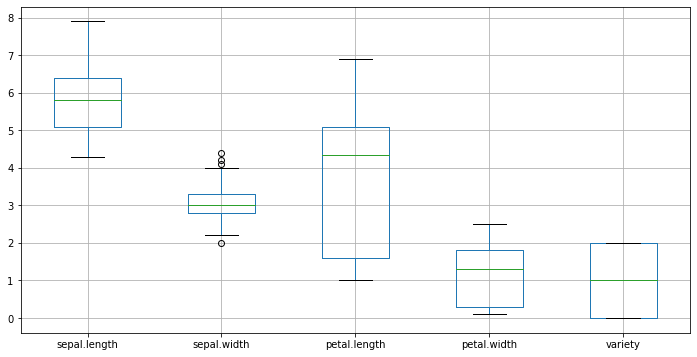

In [ ]:
plt.figure(figsize=(12, 6), facecolor="white")
irisDF.boxplot()
plt.show()

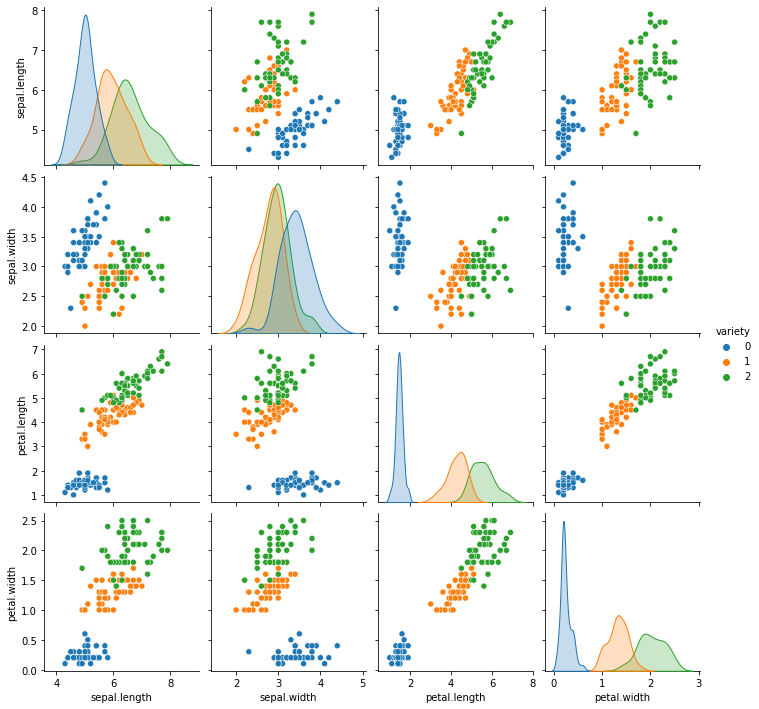

In [ ]:
sns.pairplot(data = irisDF, hue='variety', palette="tab10")
plt.show()

Com a visualização dos plots, é possível perceber que os atributos *petal.length* e *petal.width* permitem uma diferenciação entre classes mais visível.

Ou seja, até certo limite de *petal.length* e *petal.width*, a classe 0 (Setosa) não possui outras classes próximas ou sobrepostas.

In [ ]:
# Separa os dados pela classe
def show_variety_infos(df, category_index):
  """Exibir informações da classe.

  Recebe o dataframe da iris e exibe informações de determinada 'variety'.

  Parâmetros
  ----------
    df : Dataframe da iris a ser utilizado.
    category_index : Valor da categoria (factorized).
  """
  # Filtra pelo category_index
  dfPerVariety = df[df["variety"] == category_index]

  fig, axes = plt.subplots(1, 4, figsize=(15, 3))
  fig.suptitle(f'Atributos para a classe: {LABELS[category_index]}')

  # Para cada coluna do dataframe irisPerColumn,
  # [:, 0:4] = [todas as linhas, colunas 0-3 (exclui a coluna variety)]
  for idx, column in enumerate(dfPerVariety.iloc[:,0:4]):
    # Realiza o plot de histograma
    sns.histplot(ax=axes[idx], data=dfPerVariety[column])
  
  # Exibe o plot
  plt.show()

  # Exibe um resumo para a determinada variety
  print(f'Describe per {LABELS[0]}:\n', dfPerVariety.describe(), '\n')

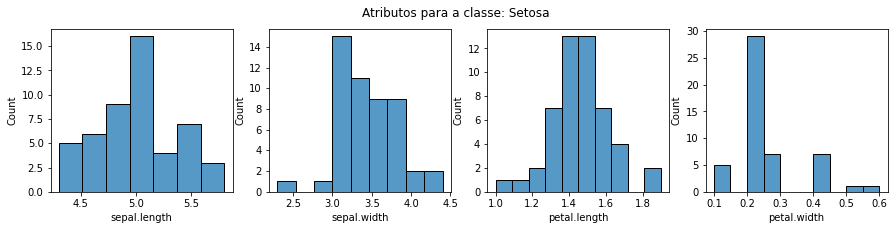

Describe per Setosa:
        sepal.length  sepal.width  petal.length  petal.width  variety
count      50.00000    50.000000     50.000000    50.000000     50.0
mean        5.00600     3.428000      1.462000     0.246000      0.0
std         0.35249     0.379064      0.173664     0.105386      0.0
min         4.30000     2.300000      1.000000     0.100000      0.0
25%         4.80000     3.200000      1.400000     0.200000      0.0
50%         5.00000     3.400000      1.500000     0.200000      0.0
75%         5.20000     3.675000      1.575000     0.300000      0.0
max         5.80000     4.400000      1.900000     0.600000      0.0 



In [ ]:
show_variety_infos(irisDF, 0)

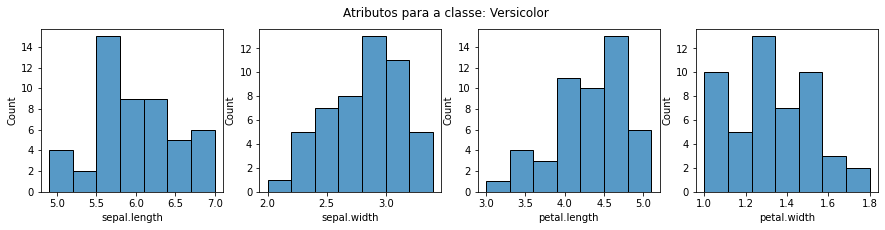

Describe per Setosa:
        sepal.length  sepal.width  petal.length  petal.width  variety
count     50.000000    50.000000     50.000000    50.000000     50.0
mean       5.936000     2.770000      4.260000     1.326000      1.0
std        0.516171     0.313798      0.469911     0.197753      0.0
min        4.900000     2.000000      3.000000     1.000000      1.0
25%        5.600000     2.525000      4.000000     1.200000      1.0
50%        5.900000     2.800000      4.350000     1.300000      1.0
75%        6.300000     3.000000      4.600000     1.500000      1.0
max        7.000000     3.400000      5.100000     1.800000      1.0 



In [ ]:
show_variety_infos(irisDF, 1)

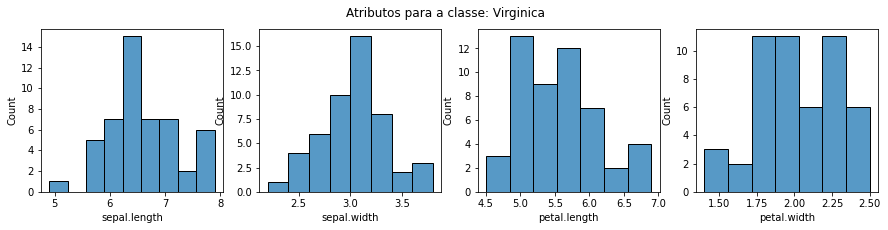

Describe per Setosa:
        sepal.length  sepal.width  petal.length  petal.width  variety
count      50.00000    50.000000     50.000000     50.00000     50.0
mean        6.58800     2.974000      5.552000      2.02600      2.0
std         0.63588     0.322497      0.551895      0.27465      0.0
min         4.90000     2.200000      4.500000      1.40000      2.0
25%         6.22500     2.800000      5.100000      1.80000      2.0
50%         6.50000     3.000000      5.550000      2.00000      2.0
75%         6.90000     3.175000      5.875000      2.30000      2.0
max         7.90000     3.800000      6.900000      2.50000      2.0 



In [ ]:
show_variety_infos(irisDF, 2)

Com os valores numéricos expostos, percebe-se que a classe **Setosa**  tem seus valores para as propriedades *petal.length* (1.9) e *petal.width* (0.6) inferiores aos mesmos atributos para as classes **Versicolor** e **Virginica**.

Com os dados deste dataset, é possível "traçar" e visualizar fronteiras de decisão com mais facilidade entre a **Setosa** e as outras classes.

## Separação Treino/Teste

### Hold-Out 70%/30%:

Dividir o conjunto de dados em subconjuntos mutuamente exclusivos de treinamento e teste.

<p align="center">
<img src="https://miro.medium.com/max/716/1*lUTgVK-A4F1yMYuUEdWtVw.png" alt="Hold-Out" >
</p>


In [ ]:
dataHoldOut = {
    "X_train": [],
    "X_test": [],
    "Y_train": [],
    "Y_test": []
}

# Seeds aleatorias definidas, para manter o experimento no notebook constante
for seed in [1,11,22,33,14,15,16,55,75,67]:
  X_train, X_test, Y_train, Y_test = train_test_split(
      X, d, test_size=0.25,shuffle=True, random_state=seed)
  
  print("seed: ", seed)  
  print("Y_Treino: ", np.unique(Y_train, return_counts = True))
  print("Y_Teste: ", np.unique(Y_test, return_counts = True))

  dataHoldOut["X_train"].append(X_train)
  dataHoldOut["X_test"].append(X_test)
  dataHoldOut["Y_train"].append(Y_train)
  dataHoldOut["Y_test"].append(Y_test)

seed:  1
Y_Treino:  (array([0, 1, 2]), array([37, 34, 41]))
Y_Teste:  (array([0, 1, 2]), array([13, 16,  9]))
seed:  11
Y_Treino:  (array([0, 1, 2]), array([38, 39, 35]))
Y_Teste:  (array([0, 1, 2]), array([12, 11, 15]))
seed:  22
Y_Treino:  (array([0, 1, 2]), array([39, 37, 36]))
Y_Teste:  (array([0, 1, 2]), array([11, 13, 14]))
seed:  33
Y_Treino:  (array([0, 1, 2]), array([42, 39, 31]))
Y_Teste:  (array([0, 1, 2]), array([ 8, 11, 19]))
seed:  14
Y_Treino:  (array([0, 1, 2]), array([33, 37, 42]))
Y_Teste:  (array([0, 1, 2]), array([17, 13,  8]))
seed:  15
Y_Treino:  (array([0, 1, 2]), array([38, 36, 38]))
Y_Teste:  (array([0, 1, 2]), array([12, 14, 12]))
seed:  16
Y_Treino:  (array([0, 1, 2]), array([37, 35, 40]))
Y_Teste:  (array([0, 1, 2]), array([13, 15, 10]))
seed:  55
Y_Treino:  (array([0, 1, 2]), array([37, 38, 37]))
Y_Teste:  (array([0, 1, 2]), array([13, 12, 13]))
seed:  75
Y_Treino:  (array([0, 1, 2]), array([38, 36, 38]))
Y_Teste:  (array([0, 1, 2]), array([12, 14, 12]))
se

Para Treino, um balanceamento perfeito seria de 37,5 para cada classe ($50 * 0.75$). Para teste, seria de 12  ,5 ($50*0.25$).

A variação em torno de 37, 5 é inferior a 10% (34 ~ 41)
A variação em torno de 12,5 é inferior a 30% (9 ~ 16)

### K-Folds (Stratified):

Dividir os dados em k subconjuntos, treinando em todos menos em um, avaliando o modelo no por meio do subconjunto restante.

No modo *Stratified*, esses subconjuntos buscam preservar a proporção das classes.

<p align="center">
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="K-Folds" height="231" width="333">
</p>

In [ ]:
dataKFold = {
    "X_train": [],
    "X_test": [],
    "Y_train": [],
    "Y_test": []
}

kfo = StratifiedKFold(n_splits=10)
kfo.get_n_splits(X, d)

for train_index, test_index in kfo.split(X, d):
    # print("TRAIN:", train_index, "TEST:", test_index)
    dataKFold["X_train"].append(X[train_index])
    dataKFold["X_test"].append(X[test_index]) 
    dataKFold["Y_train"].append(d[train_index])
    dataKFold["Y_test"].append(d[test_index])

    #print("seed: ", seed)  
    print("Y_Treino: ", np.unique(d[train_index], return_counts = True))
    print("Y_Teste: ", np.unique(d[test_index], return_counts = True))
  
#for n in dataKFold["Y_train"]:
#  print(n)

#for m in dataKFold["Y_test"]:
#  print(m)

Y_Treino:  (array([0, 1, 2]), array([45, 45, 45]))
Y_Teste:  (array([0, 1, 2]), array([5, 5, 5]))
Y_Treino:  (array([0, 1, 2]), array([45, 45, 45]))
Y_Teste:  (array([0, 1, 2]), array([5, 5, 5]))
Y_Treino:  (array([0, 1, 2]), array([45, 45, 45]))
Y_Teste:  (array([0, 1, 2]), array([5, 5, 5]))
Y_Treino:  (array([0, 1, 2]), array([45, 45, 45]))
Y_Teste:  (array([0, 1, 2]), array([5, 5, 5]))
Y_Treino:  (array([0, 1, 2]), array([45, 45, 45]))
Y_Teste:  (array([0, 1, 2]), array([5, 5, 5]))
Y_Treino:  (array([0, 1, 2]), array([45, 45, 45]))
Y_Teste:  (array([0, 1, 2]), array([5, 5, 5]))
Y_Treino:  (array([0, 1, 2]), array([45, 45, 45]))
Y_Teste:  (array([0, 1, 2]), array([5, 5, 5]))
Y_Treino:  (array([0, 1, 2]), array([45, 45, 45]))
Y_Teste:  (array([0, 1, 2]), array([5, 5, 5]))
Y_Treino:  (array([0, 1, 2]), array([45, 45, 45]))
Y_Teste:  (array([0, 1, 2]), array([5, 5, 5]))
Y_Treino:  (array([0, 1, 2]), array([45, 45, 45]))
Y_Teste:  (array([0, 1, 2]), array([5, 5, 5]))


## Definição de Funções

### Plots:

In [ ]:
# Colormap
cmap = colors.LinearSegmentedColormap(
    "red_blue_classes",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)
plt.cm.register_cmap(cmap=cmap)

In [ ]:
#Plot para LDA e QDA

def plot_data(clf, X, y, y_pred):
    """
    (sklearn example) Realiza um plot para problemas de classificação

    Parâmetros
    ----------
    clf : classificador a ser utilizado (lda, qda, etc...)
    X : parâmetros a serem utilizados (2 colunas)
    y : classes dos dados
    y_pred : predições do modelo treinado

    Returns
    -------
    splot : retorna um subplot AxesSubplot

    """ 
    idx = 1
    splot = plt.subplot(1,1, idx)
    # splot = plt.plot()

    tp = y == y_pred  # True Positive
    tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[ y == 2]
    X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    X2_tp, X2_fp = X2[tp2], X2[~tp2]
    

    # class 0: dots (Expera-se que sejam a classe 0)
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker="s", color="#DD0000")
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker="+", s=20, color="#880000")  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker="o", color="#00DD00")
    plt.scatter(
        X1_fp[:, 0], X1_fp[:, 1], marker="x", s=20, color="#008800"
    )  # dark green

    # class 2: dots
    plt.scatter(X2_tp[:, 0], X2_tp[:, 1], marker="o", color="#0000DD")
    plt.scatter(
        X2_fp[:, 0], X2_fp[:, 1], marker="x", s=20, color="#000088")  # dark blue

    # class 0 and 1 (and 2): areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(
        xx, yy, Z, cmap="red_blue_classes", norm=colors.Normalize(0.0, 1.0), zorder=0
    )
    plt.contour(xx, yy, Z, [0.5,1], linewidths=[2.0,2.0], colors=["cyan","white"])

    # means
    plt.plot(
        clf.means_[0][0],
        clf.means_[0][1],
        "*",
        color="blue",
        markersize=15,
        markeredgecolor="grey",
    )
    plt.plot(
        clf.means_[1][0],
        clf.means_[1][1],
        "*",
        color="purple",
        markersize=15,
        markeredgecolor="white",
    )
    plt.plot(
    clf.means_[2][0],
    clf.means_[2][1],
    "*",
    color="orange",
    markersize=15,
    markeredgecolor="white",
    )

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.1)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
  plot_ellipse(splot, lda.means_[0], lda.covariance_, "orange")
  plot_ellipse(splot, lda.means_[1], lda.covariance_, "purple")
  plot_ellipse(splot, lda.means_[2], lda.covariance_, "yellow")

def plot_qda_cov(qda, splot):
  plot_ellipse(splot, qda.means_[0], qda.covariance_[0], "red")
  plot_ellipse(splot, qda.means_[1], qda.covariance_[1], "blue")
  plot_ellipse(splot, qda.means_[2], qda.covariance_[2], "green")


In [ ]:
def plot_boundary1(clf, X, y, y_pred,
                   title = None, axis = None, labels = None,
                   myPoints = None):
  """
  Realiza um plot simples para ilustrar os dados e decisões de fronteiras
  (para o iris dataset)

  Parâmetros
  ----------
  clf : classificador a ser utilizado (lda, qda, etc...)
  X : parâmetros a serem utilizados (2 colunas)
  y : classes dos dados
  y_pred : predições do modelo treinado
  * myPoint : ponto(s) a serem testados
  * title : título do plot
  * axis : (x,y) Rótulo dos eixos

  Returns
  -------
  splot : retorna um subplot AxesSubplot

  """ 
  # Subplot a ser retornado
  splot = plt.subplot(1, 1, 1)
  if title:
    plt.title(title)
  if axis[0] and axis[1]:
    plt.xlabel(axis[0])
    plt.ylabel(axis[1])

  
  # Limites e step
  x_min, x_max = X[:, 0].min() - .25, X[:, 0].max() + .25
  y_min, y_max = X[:, 1].min() - .25, X[:, 1].max() + .25
  h = 0.01

  tp = y == y_pred  # True Positive
  tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
  X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
  X0_tp, X0_fp = X0[tp0], X0[~tp0]
  X1_tp, X1_fp = X1[tp1], X1[~tp1]
  X2_tp, X2_fp = X2[tp2], X2[~tp2]
  
  # Grid de pontos com h distância entre eles
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Predição de valores para o grid
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  # limitam as classes 0, 1, 2
  limiters = [-0.5, 0.5, 1.5, 2.5]

  # Plotar contornos e regiões
  plt.contourf(xx, yy, Z, limiters, colors=['#ff0000', '#00ff00', '#0000ff'], alpha=0.25)

  #Plot de TruePositives e FalsePositives
  ## class 0: dots
  plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker=".", color="#AA1717",
              label=f'{labels[0]} (TP)')
  plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker="x", s=20, color="#771100",
              label=f'{labels[0]} (FP)')  # dark red

  ## class 1: dots
  plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker=".", color="#17AA17",
              label=f'{labels[1]} (TP)')
  plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker="x", s=20, color="#007711",
              label=f'{labels[0]} (FP)')  # dark green

  ## class 2: dots
  plt.scatter(X2_tp[:, 0], X2_tp[:, 1], marker=".", color="#1717AA",
              label=f'{labels[2]} (TP)')
  plt.scatter(X2_fp[:, 0], X2_fp[:, 1], marker="x", s=20, color="#110077",
              label=f'{labels[0]} (FP)')  # dark blue
  
  #Controla as colunas da legenda
  ncols = 3
 
  if myPoints is not None:
    ncols = 6
    myColors = ["#FF0000", "#00FF00", "#0000FF"]
    # Predição dos pontos e classificação
    myPred = clf.predict(myPoints)
    myX0, myX1, myX2 = myPoints[myPred == 0], myPoints[myPred == 1], myPoints[myPred == 2]

    # Classe 0:
    plt.scatter(myX0[:,0], myX0[:,1], marker="s", s=20,
                color=myColors[0], edgecolors="#000000",
                label=f'Teste: {labels[0]}')
    # Classe 1:
    plt.scatter(myX1[:,0], myX1[:,1], marker="s", s=20,
            color=myColors[1], edgecolors="#000000",
            label=f'Teste: {labels[1]}')
    # Classe 2:
    plt.scatter(myX2[:,0], myX2[:,1], marker="s", s=20,
        color=myColors[2], edgecolors="#000000",
        label=f'Teste: {labels[2]}')
    

  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=ncols)

  return splot


### Validação:

In [ ]:
def do_validation(clf, att = 'full'):  
  """
  Realiza validação cruzada, ao separar e comparar
  subconjuntos de treino e de teste

  Parâmetros
  ----------
  clf : classificador a ser utilizado (lda, qda, etc...)

  Returns
  -------
  splot : retorna um subplot AxesSubplot

  """
  if att == 'full':
    start = 0
  elif att == '2att':
    start = 2

  accHoldOut = []
  cmHoldOut = []
  gotTimes = []

  # print("Hold-Out:")
  for idx in range(10):
    X_train = dataHoldOut["X_train"][idx][:,start:4]
    Y_train = dataHoldOut["Y_train"][idx]
    X_test = dataHoldOut["X_test"][idx][:,start:4]
    Y_test = dataHoldOut["Y_test"][idx]

    start_time = time.time()
    clfPredict = clf.fit(X_train, Y_train).predict(X_test)
    gotTimes.append(time.time() - start_time)

    acc = clf.score(X_test, Y_test)
    accHoldOut.append(acc)

    dispCM = confusion_matrix(Y_test, clfPredict)
    # ConfusionMatrixDisplay(confusion_matrix(Y_test, clfPredict), display_labels=LABELS)
    cmHoldOut.append(dispCM)
    # axs[i//5, i%5] = dispCM
    # dispCM.plot(ax=axs[idx//5, idx%5])

    # print("Acc: ", acc)
    # print("Quantidades de cada classe: ",np.unique(clfPredict, return_counts=True)[1])
  # cmHoldOut=fig
  # plt.plot()

  accKFold = []
  cmKFold = []

  #print("\nK-Fold:")
  for idx in range(10):
    X_train = dataKFold["X_train"][idx][:,start:4]
    Y_train = dataKFold["Y_train"][idx]
    X_test = dataKFold["X_test"][idx][:,start:4]
    Y_test = dataKFold["Y_test"][idx]
    
    start_time = time.time()    
    clfPredict = clf.fit(X_train, Y_train).predict(X_test)
    gotTimes.append(time.time() - start_time)

    acc = clf.score(X_test, Y_test)
    accKFold.append(acc)
    cmKFold.append(confusion_matrix(Y_test, clfPredict))
    #print("Acc: ", acc)
    #print("Quantidades de cada classe: ",np.unique(clfPredict, return_counts=True)[1])

  # Retorna a concatenação de acurácia do Hold-Out + K-Folds
  return accHoldOut, cmHoldOut, accKFold, cmKFold, gotTimes

In [ ]:
# Plot boxplot com table

#plt.figure(figsize=(10,5))
#plt.boxplot([accLDA['values'], accQDA['values'], accGNB['values']],
#            labels=["LDA", "QDA", "GNB"], showmeans=True)
#plt.grid(alpha=0.5)
#plt.table(cellText=[
#    [desDF["LDA"].max().round(3) , desDF["QDA"].max().round(3) , desDF["GNB"].max().round(3)],
#    [desDF["LDA"].quantile(0.75).round(3) , desDF["QDA"].quantile(0.75).round(3) , desDF["GNB"].quantile(0.75).round(5)],
#    [desDF["LDA"].quantile(0.50).round(3) , desDF["QDA"].quantile(0.50).round(3) , desDF["GNB"].quantile(0.50).round(5)],
#    [desDF["LDA"].quantile(0.25).round(3) , desDF["QDA"].quantile(0.25).round(3) , desDF["GNB"].quantile(0.25).round(5)],
#    [desDF["LDA"].min().round(3) , desDF["QDA"].min().round(3) , desDF["GNB"].min().round(3)],
#    [desDF["LDA"].mean().round(3) , desDF["QDA"].mean().round(3) , desDF["GNB"].mean().round(3)],
#    [desDF["LDA"].std().round(3) , desDF["QDA"].std().round(3) , desDF["GNB"].std().round(3)],
#    ],
#    rowLabels=["Máximo", '75%', '50%', '25%', 'Mínimo', 'Média', 'Desvio'],
#    loc='bottom',
#    bbox=[0, -0.6, 1, 0.5])
#plt.show()

### Matrizes de Confusão:

In [ ]:
def plot_all_confusion(confusions, title):

  fig, axs = plt.subplots(2,5, figsize=(24, 10))

  for idx, confusion in enumerate(confusions):
    cm = ConfusionMatrixDisplay(confusion, display_labels=LABELS)
    cm.plot(ax=axs[idx//5, idx%5])

  fig.suptitle(title, fontsize=16)
  plt.show()

## Classificadores

1.   Linear Discriminant Analysis (LDA)
2.   Quadratic Discriminant Analysis (QDA)
3. Gaussian Naive Bayes (GNB) 



### Linear Discriminant Analysis (LDA)

A **Análise Discriminante Linear** de Fisher ou Gaussian LDA mede qual centroide de cada classe é o mais próximo, levando em consideração a covariância das variáveis.

<p align="center">
<img src="https://datacadamia.com/_media/data_mining/fisher_discriminant_plot.jpg?tseed=1395136425" alt="LDA" height="200">
</p>


#### Dados Totais: 4 Atributos (full)

In [ ]:
ldaA = LinearDiscriminantAnalysis(store_covariance=True)
ldaPredictA = ldaA.fit(X, d).predict(X)

print("Acc: ", ldaA.score(X, d))
print("Quantidades de cada classe: ",np.unique(ldaPredictA, return_counts=True)[1])

Acc:  0.98
Quantidades de cada classe:  [50 49 51]


#### Dados Totais: 2 Atributos (2att)

In [ ]:
ldaB = LinearDiscriminantAnalysis(store_covariance=True)
ldaPredictB = ldaB.fit(X_2att, d).predict(X_2att)

print("Acc: ", ldaB.score(X_2att, d))
print("Quantidades de cada classe: ",np.unique(ldaPredictB, return_counts=True)[1])

Acc:  0.96
Quantidades de cada classe:  [50 52 48]


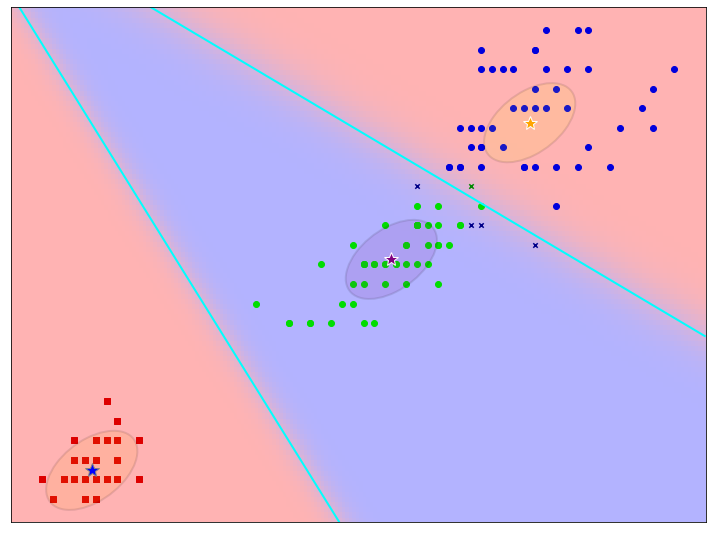

In [ ]:
plt.figure(figsize=(10, 8), facecolor="white")

splot = plot_data(ldaB, X_2att, d, ldaPredictB)
plot_lda_cov(ldaB, splot)
plt.axis("tight")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

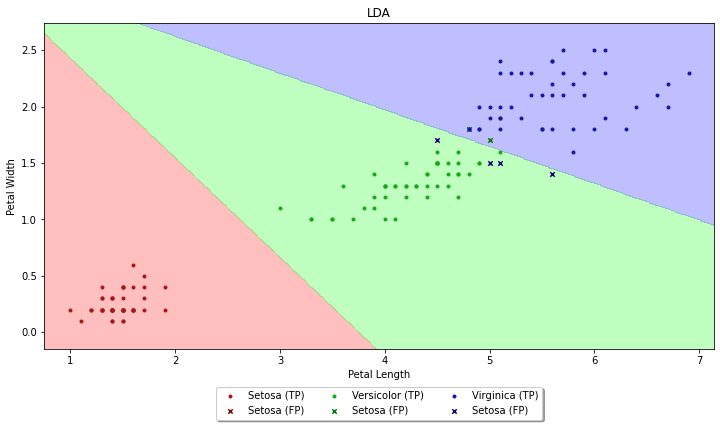

In [ ]:
# Teste com LDA
plt.figure(figsize=(12, 6), facecolor="white")
ldaSplot = plot_boundary1(ldaB, X_2att, d, ldaPredictB, title = "LDA",
                          axis = ["Petal Length", "Petal Width"], labels=LABELS)

#### Validação do LDA

In [ ]:
# Teste Holdout & K-folds
ldaC = LinearDiscriminantAnalysis()
accHOValues, confusionHO, accKFValues, confusionKF, accTimes = do_validation(ldaC)

accLDAHO = {
    "accValues": accHOValues,    
    "accAvg": np.mean(accHOValues),
    "accStd": np.std(accHOValues),
    "time": np.mean(accTimes),
    "confusion": confusionHO,
}

accLDAKF = {
    "accValues": accKFValues,    
    "accAvg": np.mean(accKFValues),
    "accStd": np.std(accKFValues),
    "time": np.mean(accTimes),
    "confusion": confusionKF,
}

accHOValues, confusionHO, accKFValues, confusionKF, accTimes = do_validation(ldaC, att="2att")

accLDAHO2t = {
    "accValues": accHOValues,    
    "accAvg": np.mean(accHOValues),
    "accStd": np.std(accHOValues),
    "time": np.mean(accTimes),
    "confusion": confusionHO,
}

accLDAKF2t = {
    "accValues": accKFValues,    
    "accAvg": np.mean(accKFValues),
    "accStd": np.std(accKFValues),
    "time": np.mean(accTimes),
    "confusion": confusionKF,
}

In [ ]:
ldaCompDF = pd.DataFrame([
    [accLDAHO['accAvg'], accLDAHO['accStd'], accLDAHO['time'], accLDAKF['accAvg'],accLDAKF['accStd'], accLDAKF['time']],
    [accLDAHO2t['accAvg'], accLDAHO2t['accStd'], accLDAHO2t['time'], accLDAKF2t['accAvg'], accLDAKF2t['accStd'], accLDAKF2t['time']]
    ],
    index=pd.Index(['4', '2'], name='Nº Atributos'),
    columns=pd.MultiIndex.from_product(
        [['Hold-Out', 'K-Folds'],['Acurácia Média', 'Desvio Padrão', 'Exec. Média']],
        names=['Treino/Teste:', 'Valor:'])
    )

ldaCompDF.style.set_caption("Validação - LDA")


In [ ]:
#plt.figure(figsize=(12, 6), facecolor="white")
#ldaSplot = plot_boundary1(ldaC, X_train, Y_train, ldaC.predict(X_train), title = "LDA - Treino",
#                          axis = ["Petal Length", "Petal Width"], labels=LABELS)

In [ ]:
#plt.figure(figsize=(12, 6), facecolor="white")
#ldaSplot = plot_boundary1(ldaC, X_test, Y_test, ldaC.predict(X_test), title = "LDA - Teste",
#                          axis = ["Petal Length", "Petal Width"], labels=LABELS)

In [ ]:
#plt.figure(figsize=(12, 6), facecolor="white")
#ldaSplot = plot_boundary1(ldaC, X_train, Y_train,
#                          ldaC.predict(X_train), title = "LDA - Localização do X_teste",
#                          axis = ["Petal Length", "Petal Width"],
#                          labels=LABELS, myPoints=X_test)

### Quadratic Discriminant Analysis (QDA)

A **análise discriminante quadrática** usa uma matriz de covariância diferente para cada classe, onde as funções discriminantes de X (dados) são quadráticas.

<p align="center">
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lda_qda_001.png" alt="LDA & QDA" height="400">
</p>

#### Dados Totais: 4 Atributos (full)

In [ ]:
qdaA = QuadraticDiscriminantAnalysis(store_covariance=True)
qdaPredictA = qdaA.fit(X, d).predict(X)

print("Acc: ", qdaA.score(X, d))
print("Quantidades de cada classe: ",np.unique(qdaPredictA, return_counts=True)[1])

Acc:  0.98
Quantidades de cada classe:  [50 49 51]


#### Dados Totais: 2 Atributos (2att)

In [ ]:
qdaB = QuadraticDiscriminantAnalysis(store_covariance=True)
qdaPredictB = qdaB.fit(X_2att, d).predict(X_2att)

print("Acc: ", qdaB.score(X_2att, d))
print("Quantidades de cada classe: ",np.unique(qdaPredictB, return_counts=True)[1])

Acc:  0.98
Quantidades de cada classe:  [50 51 49]


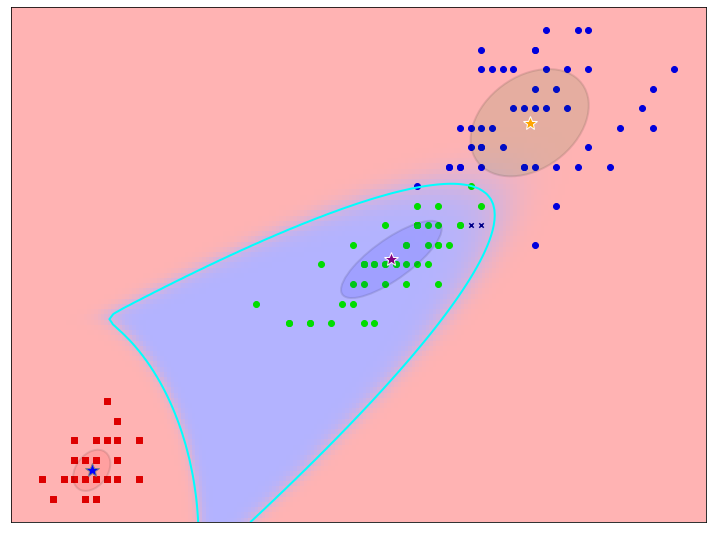

In [ ]:
plt.figure(figsize=(10, 8), facecolor="white")

splot = plot_data(qdaB, X_2att, d, qdaPredictB)
plot_qda_cov(qdaB, splot)
plt.axis("tight")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

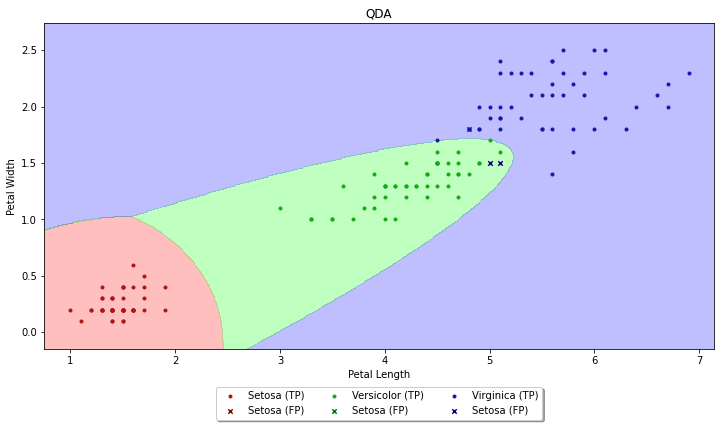

In [ ]:
# Teste com QDA
plt.figure(figsize=(12, 6), facecolor="white")
qdaSplot = plot_boundary1(qdaB, X_2att, d, qdaPredictB, title = "QDA",
                          axis = ["Petal Length", "Petal Width"], labels=LABELS)

#### Validação do QDA

In [ ]:
# Teste Holdout & K-folds
qdaC = QuadraticDiscriminantAnalysis()
accHOValues, confusionHO, accKFValues, confusionKF, accTimes = do_validation(qdaC)

accQDAHO = {
    "accValues": accHOValues,    
    "accAvg": np.mean(accHOValues),
    "accStd": np.std(accHOValues),
    "time": np.mean(accTimes),
    "confusion": confusionHO,
}

accQDAKF = {
    "accValues": accKFValues,    
    "accAvg": np.mean(accKFValues),
    "accStd": np.std(accKFValues),
    "time": np.mean(accTimes),
    "confusion": confusionKF,
}

accHOValues, confusionHO, accKFValues, confusionKF, accTimes = do_validation(ldaC, att="2att")

accQDAHO2t = {
    "accValues": accHOValues,    
    "accAvg": np.mean(accHOValues),
    "accStd": np.std(accHOValues),
    "time": np.mean(accTimes),
    "confusion": confusionHO,
}

accQDAKF2t = {
    "accValues": accKFValues,    
    "accAvg": np.mean(accKFValues),
    "accStd": np.std(accKFValues),
    "time": np.mean(accTimes),
    "confusion": confusionKF,
}

In [ ]:
qdaCompDF = pd.DataFrame([
    [accQDAHO['accAvg'], accQDAHO['accStd'], accQDAHO['time'], accQDAKF['accAvg'], accQDAKF['accStd'], accQDAKF['time']],
    [accQDAHO2t['accAvg'], accQDAHO2t['accStd'], accQDAHO2t['time'], accQDAKF2t['accAvg'], accQDAKF2t['accStd'], accQDAKF2t['time']]
    ],
    index=pd.Index(['4', '2'], name='Nº Atributos'),
    columns=pd.MultiIndex.from_product(
        [['Hold-Out', 'K-Folds'],['Acurácia Média', 'Desvio Padrão', 'Exec. Média']],
        names=['Treino/Teste:', 'Valor:'])
    )

qdaCompDF.style.set_caption("Validação - QDA")

In [ ]:
#plt.figure(figsize=(12, 6), facecolor="white")
#qdaSplot = plot_boundary1(qdaC, X_train, Y_train, qdaC.predict(X_train), title = "QDA - Treino",
#                          axis = ["Petal Length", "Petal Width"], labels=LABELS)

In [ ]:
#plt.figure(figsize=(12, 6), facecolor="white")
#qdaSplot = plot_boundary1(qdaC, X_test, Y_test, qdaC.predict(X_test), title = "QDA - Teste",
#                          axis = ["Petal Length", "Petal Width"], labels=LABELS)

In [ ]:
#plt.figure(figsize=(12, 6), facecolor="white")
#qdaSplot = plot_boundary1(qdaC, X_train, Y_train,
#                          qdaC.predict(X_train), title = "QDA - Localização do X_test",
#                          axis = ["Petal Length", "Petal Width"],
#                          labels=LABELS, myPoints=X_test)

### Gaussian Naive Bayes (GNB)

Naive Bayes faz previsões usando o Teorema de Bayes, que deriva a probabilidade de uma previsão da evidência subjacente, conforme observado nos dados.

<p align="center">
<img src="https://miro.medium.com/max/1400/1*CnoTGGO7XeUpUMeXDrIfvA.png" alt="Teorema de Bayes" height="200">
</p>

O classificador Naive Bayes assume que os atributos para prever o alvo são independentes e não afetam uns aos outros. (Enquanto em dados da vida real, os recursos dependem uns dos outros para determinar o alvo).

$P(B|A) = \frac{\displaystyle P(A_1|B)P(A_2|B) \dots P(A_n|B)}{P(B)}$

É um modelo generativo, retornando probabilidades.

<p align="center">
<img src="https://miro.medium.com/max/1000/1*K5oq0ibk5snoSwhqe9X2gA.png" alt="LDA & QDA" height="200">
</p>



#### Dados Totais: 4 Atributos (full)

In [ ]:
gnbA = GaussianNB()
gnbPredictA = gnbA.fit(X, d).predict(X)

print("Acc: ", gnbA.score(X, d))
print("Quantidades de cada classe: ",np.unique(gnbPredictA, return_counts=True)[1])

Acc:  0.96
Quantidades de cada classe:  [50 50 50]


#### Dados Totais: 2 Atributos (2att)

Acc:  0.96
Quantidades de cada classe:  [50 50 50]


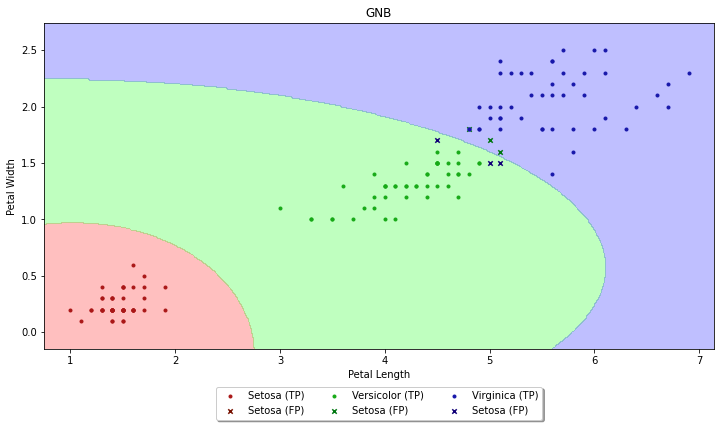

In [ ]:
gnbB = GaussianNB()
gnbPredictB = gnbB.fit(X_2att, d).predict(X_2att)

print("Acc: ", gnbB.score(X_2att, d))
print("Quantidades de cada classe: ",np.unique(gnbPredictB, return_counts=True)[1])

plt.figure(figsize=(12, 6), facecolor="white")
gnbSplot = plot_boundary1(gnbB, X_2att, d, gnbPredictB, title = "GNB",
                          axis = ["Petal Length", "Petal Width"], labels=LABELS)

#### Validação do GNB

In [ ]:
# Teste Holdout & K-folds
gnbC = GaussianNB()
accHOValues, confusionHO, accKFValues, confusionKF, accTimes  = do_validation(gnbC)

accGNBHO = {
    "accValues": accHOValues,    
    "accAvg": np.mean(accHOValues),
    "accStd": np.std(accHOValues),
    "time": np.mean(accTimes),
    "confusion": confusionHO,
}

accGNBKF = {
    "accValues": accKFValues,    
    "accAvg": np.mean(accKFValues),
    "accStd": np.std(accKFValues),
    "time": np.mean(accTimes),
    "confusion": confusionKF,
}

accHOValues, confusionHO, accKFValues, confusionKF, accTimes  = do_validation(ldaC, att="2att")

accGNBHO2t = {
    "accValues": accHOValues,    
    "accAvg": np.mean(accHOValues),
    "accStd": np.std(accHOValues),
    "time": np.mean(accTimes),
    "confusion": confusionHO,
}

accGNBKF2t = {
    "accValues": accKFValues,    
    "accAvg": np.mean(accKFValues),
    "accStd": np.std(accKFValues),
    "time": np.mean(accTimes),
    "confusion": confusionKF,
}

In [ ]:
gnbCompDF = pd.DataFrame([
    [accGNBHO['accAvg'], accGNBHO['accStd'], accGNBHO['time'], accGNBKF['accAvg'], accGNBKF['accStd'], accGNBKF['time']],
    [accGNBHO2t['accAvg'], accGNBHO2t['accStd'], accGNBHO2t['time'], accGNBKF2t['accAvg'], accGNBKF2t['accStd'], accGNBKF2t['time']]
    ],
    index=pd.Index(['4', '2'], name='Nº Atributos'),
    columns=pd.MultiIndex.from_product(
        [['Hold-Out', 'K-Folds'],['Acurácia Média', 'Desvio Padrão', 'Exec. Média']],
        names=['Treino/Teste:', 'Valor:'])
    )

gnbCompDF.style.set_caption("Validação - GNB")

In [ ]:
#plt.figure(figsize=(12, 6), facecolor="white")
#gnbSplot = plot_boundary1(gnbC, X_train, Y_train, gnbC.predict(X_train), title = "GNB - Treino",
#                          axis = ["Petal Length", "Petal Width"], labels=LABELS)

In [ ]:
#plt.figure(figsize=(12, 6), facecolor="white")
#gnbSplot = plot_boundary1(gnbC, X_test, Y_test, gnbC.predict(X_test), title = "GNB - Teste",
#                          axis = ["Petal Length", "Petal Width"], labels=LABELS)

In [ ]:
#plt.figure(figsize=(12, 6), facecolor="white")
#gnbSplot = plot_boundary1(gnbC, X_train, Y_train,
#                          gnbC.predict(X_train), title = "GNB - Localização do X_test",
#                          axis = ["Petal Length", "Petal Width"],
#                          labels=LABELS, myPoints=X_test)

## Resultados

Será feita uma comparação entre os 3 classificadores (*LDA*, *QDA*, *GNB*), utilização de quatro (*full*, *-f*) ou dois (*2att*, *-2*) atributos, e dados obtidos utilizando *Hold-Out* (-HO) e *Stratified K-Folds*  (-KF).

### Comparação de Acurácia Média e Desvio Padrão

In [ ]:
ldaCompDF.style.set_caption("Validação - LDA")

In [ ]:
qdaCompDF.style.set_caption("Validação - QDA")

In [ ]:
gnbCompDF.style.set_caption("Validação - GNB")

Em relação a acurácia média e ao desvio padrão, os classificadores LDA e QDA se sairam melhores quando utilizados com 4 atributos, enquanto o GNB se saiu melhor utilizando apenas 2 atributos (*petal.length* e *petal.width*).

In [ ]:
resultData = {
    "LDA-f/H.O.": accLDAHO['accValues'],
    "LDA-f/K.F.": accLDAKF['accValues'],
    "LDA-2/H.O.": accLDAHO2t['accValues'],
    "LDA-2/K.F.": accLDAKF2t['accValues'],
    "QDA-f/H.O.": accQDAHO['accValues'] ,
    "QDA-f/K.F.": accQDAKF['accValues'] ,
    "QDA-2/H.O.": accQDAHO2t['accValues'],
    "QDA-2/K.F.": accQDAKF2t['accValues'],
    "GNB-f/H.O.": accGNBHO['accValues'],
    "GNB-f/K.F.": accGNBKF['accValues'],
    "GNB-2/H.O.": accGNBHO2t['accValues'],
    "GNB-2/K.F.": accGNBKF2t['accValues'],    
}

resultDF = pd.DataFrame.from_dict(resultData)
resultDF

,LDA-f/H.O.,LDA-f/K.F.,LDA-2/H.O.,LDA-2/K.F.,QDA-f/H.O.,QDA-f/K.F.,QDA-2/H.O.,QDA-2/K.F.,GNB-f/H.O.,GNB-f/K.F.,GNB-2/H.O.,GNB-2/K.F.
0,1.000000,1.000000,0.973684,1.000000,1.000000,1.000000,0.973684,1.000000,0.973684,0.933333,0.973684,1.000000
1,0.973684,1.000000,0.921053,0.933333,0.973684,1.000000,0.921053,0.933333,0.894737,0.933333,0.921053,0.933333
2,1.000000,1.000000,0.973684,1.000000,1.000000,1.000000,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000
3,1.000000,1.000000,0.947368,0.933333,1.000000,1.000000,0.947368,0.933333,0.947368,0.933333,0.947368,0.933333
4,1.000000,0.933333,0.973684,0.933333,1.000000,0.933333,0.973684,0.933333,0.973684,0.933333,0.973684,0.933333
5,1.000000,1.000000,1.000000,0.933333,1.000000,1.000000,1.000000,0.933333,1.000000,0.933333,1.000000,0.933333
6,0.973684,0.866667,0.894737,0.866667,1.000000,0.866667,0.894737,0.866667,0.894737,0.866667,0.894737,0.866667
7,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000
8,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000
9,0.973684,1.000000,0.973684,1.000000,0.921053,1.000000,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000


In [ ]:
resultDF.describe()

,LDA-f/H.O.,LDA-f/K.F.,LDA-2/H.O.,LDA-2/K.F.,QDA-f/H.O.,QDA-f/K.F.,QDA-2/H.O.,QDA-2/K.F.,GNB-f/H.O.,GNB-f/K.F.,GNB-2/H.O.,GNB-2/K.F.
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.986842,0.980000,0.960526,0.960000,0.984211,0.980000,0.960526,0.960000,0.957895,0.953333,0.960526,0.960000
std,0.013870,0.044997,0.031013,0.046614,0.025423,0.044997,0.031013,0.046614,0.035524,0.044997,0.031013,0.046614
min,0.973684,0.866667,0.894737,0.866667,0.921053,0.866667,0.894737,0.866667,0.894737,0.866667,0.894737,0.866667
25%,0.973684,1.000000,0.953947,0.933333,0.973684,1.000000,0.953947,0.933333,0.953947,0.933333,0.953947,0.933333
50%,0.986842,1.000000,0.973684,0.966667,1.000000,1.000000,0.973684,0.966667,0.973684,0.933333,0.973684,0.966667
75%,1.000000,1.000000,0.973684,1.000000,1.000000,1.000000,0.973684,1.000000,0.973684,1.000000,0.973684,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


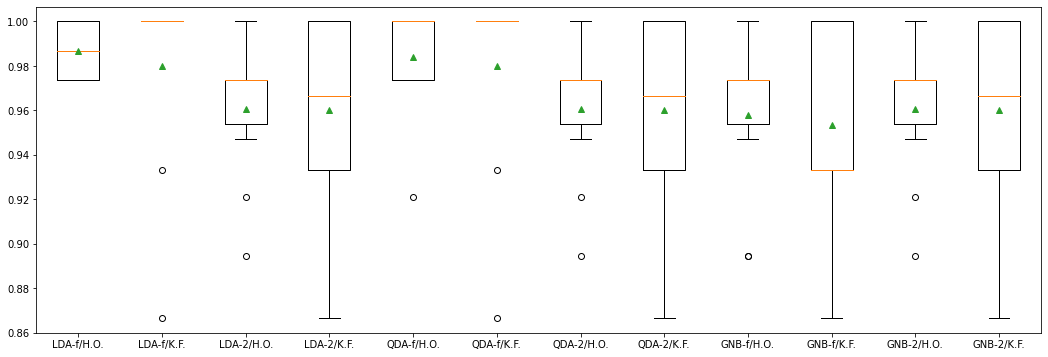

In [ ]:
plt.figure(figsize=(18, 6))
plt.boxplot(resultData.values(), labels=resultData.keys(), showmeans=True)
plt.show()

### Comparação de Matriz de Confusão

#### LDA

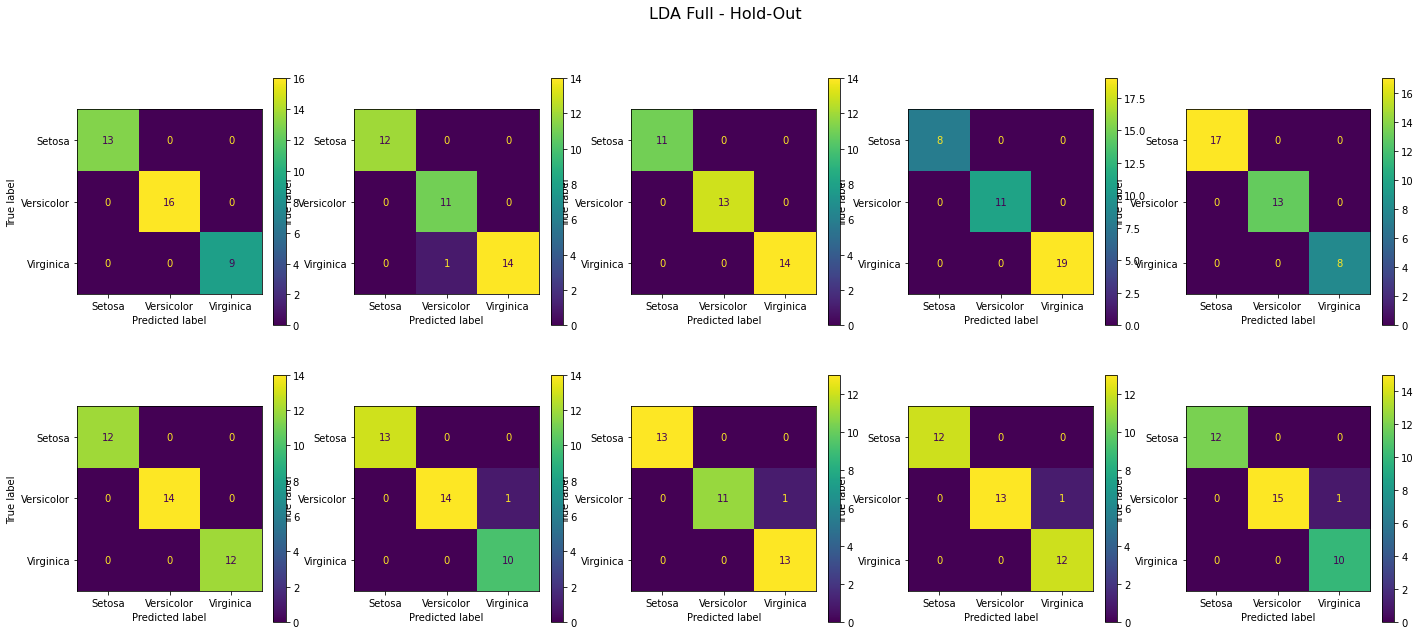

In [ ]:
plot_all_confusion(accLDAHO['confusion'], "LDA Full - Hold-Out" )

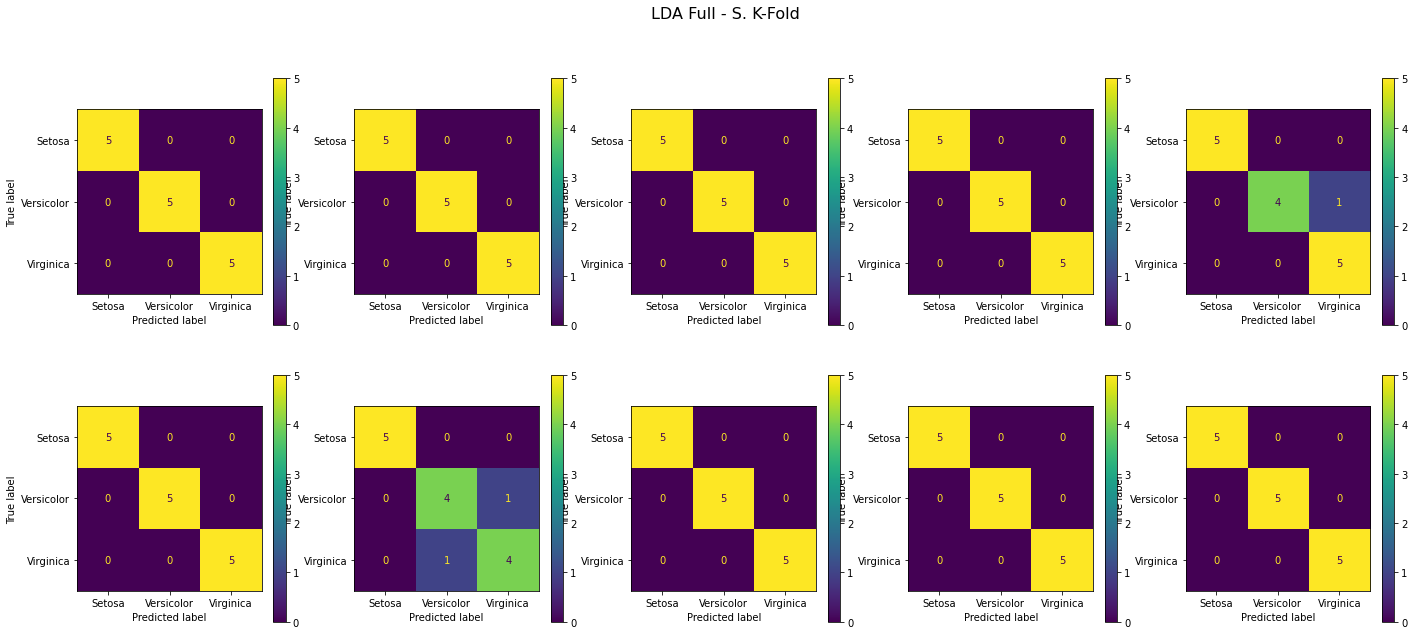

In [ ]:
plot_all_confusion(accLDAKF['confusion'], "LDA Full - S. K-Fold" )

Com 4 atributos, o LDA apresentou poucos erros entre Versicolor e Virginica, errando um pouco mais ao atribuir algumas classes Versicolor como Virgina.

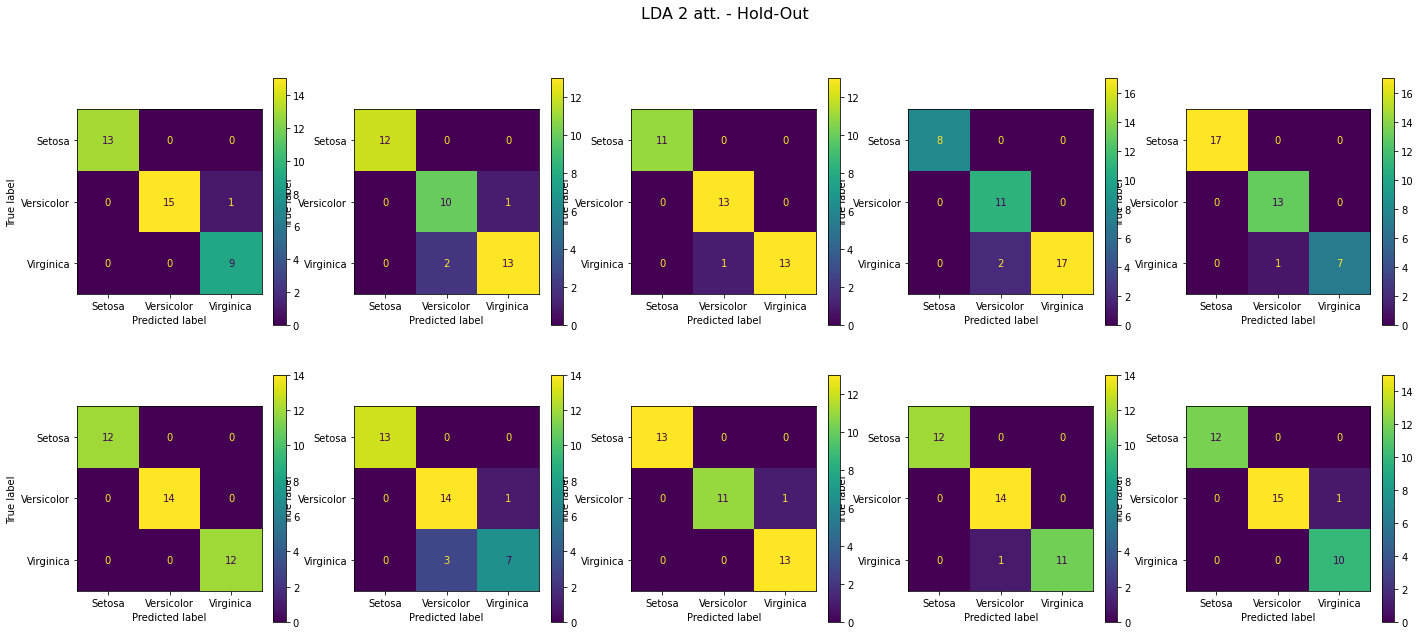

In [ ]:
plot_all_confusion(accLDAHO2t['confusion'], "LDA 2 att. - Hold-Out" )

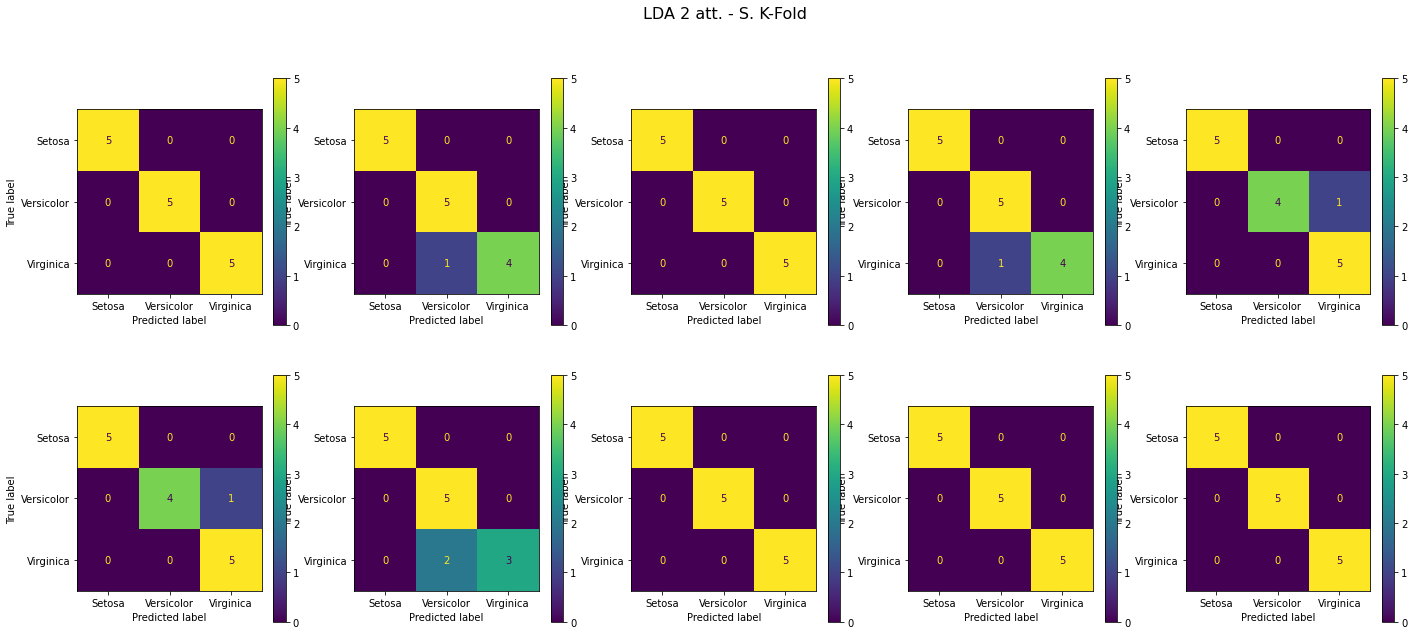

In [ ]:
plot_all_confusion(accLDAKF2t['confusion'], "LDA 2 att. - S. K-Fold" )

Ao utilizar dois atributos, o LDA acaba errando um pouco mais.

#### QDA

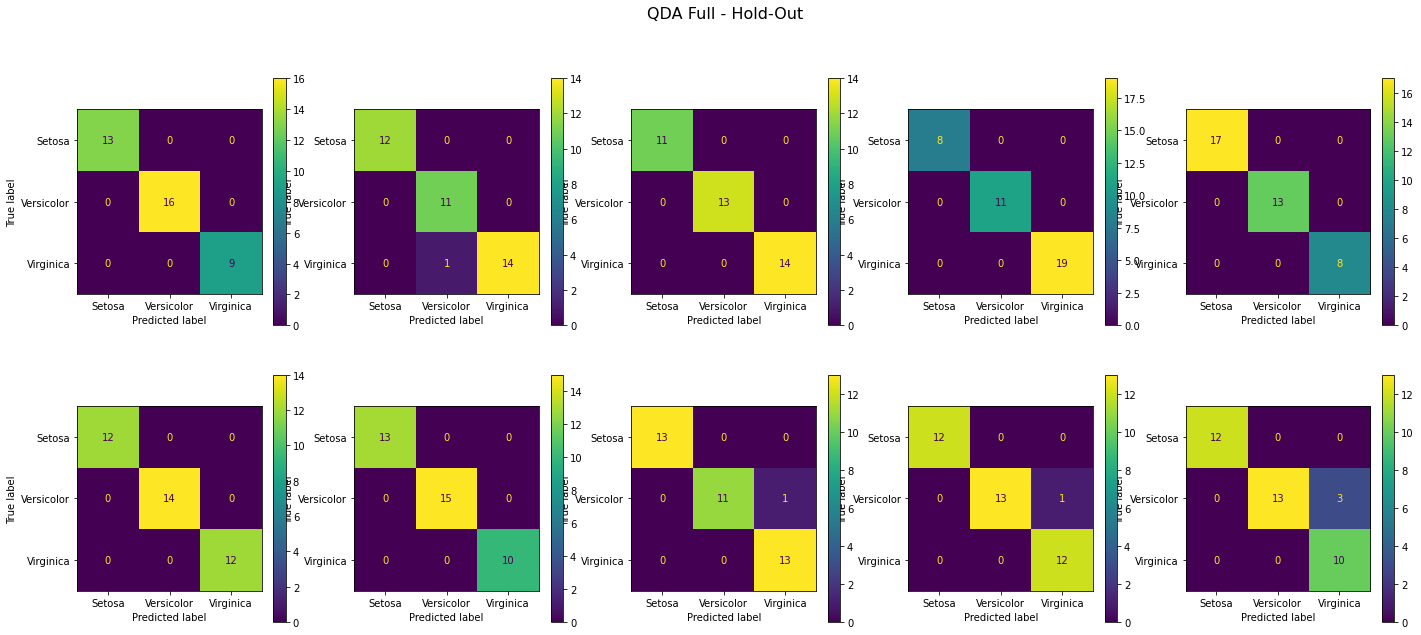

In [ ]:
plot_all_confusion(accQDAHO['confusion'], "QDA Full - Hold-Out" )

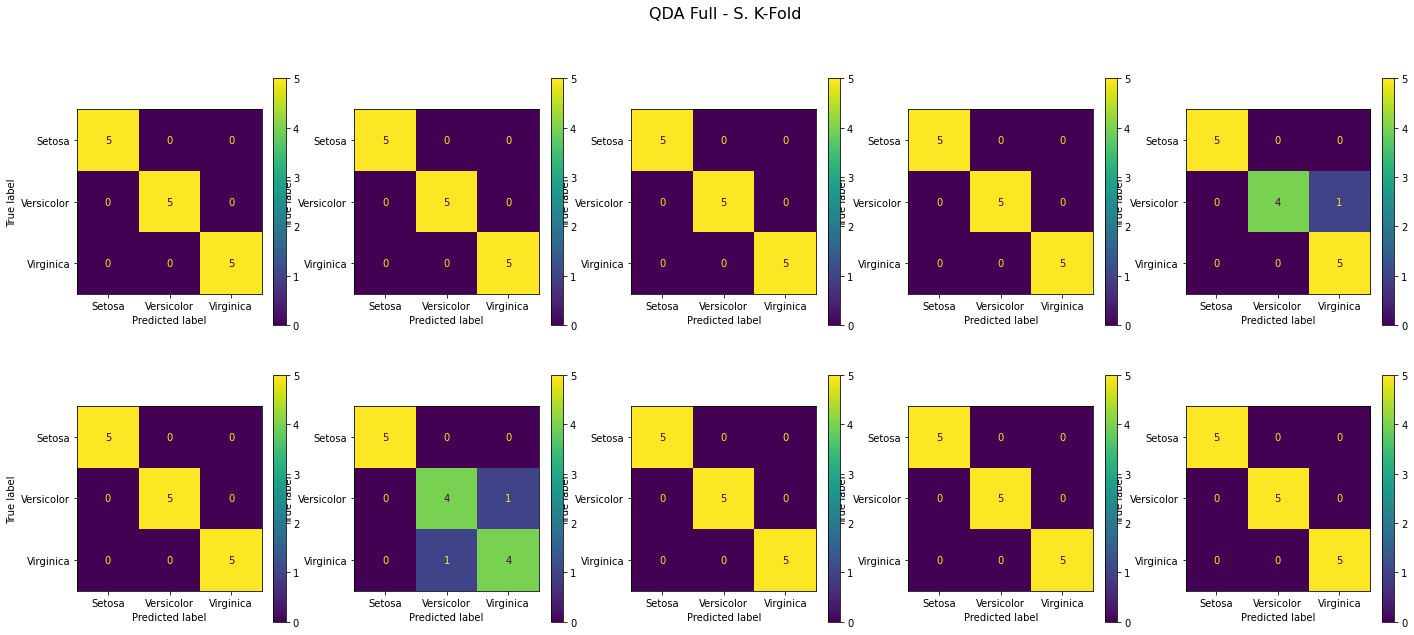

In [ ]:
plot_all_confusion(accQDAKF['confusion'], "QDA Full - S. K-Fold" )

Utilizando os quatro atributos, o QDA apresentou mais erros ao predizer Versicolors como Virginia.

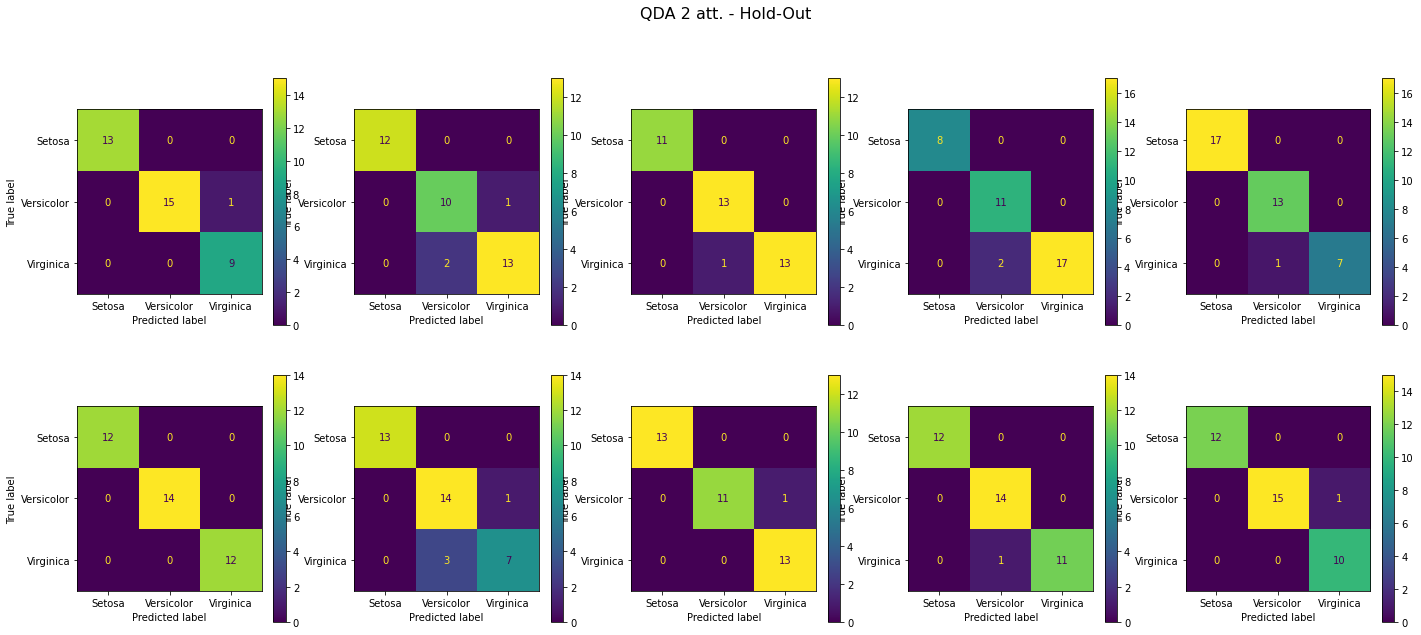

In [ ]:
plot_all_confusion(accQDAHO2t['confusion'], "QDA 2 att. - Hold-Out" )

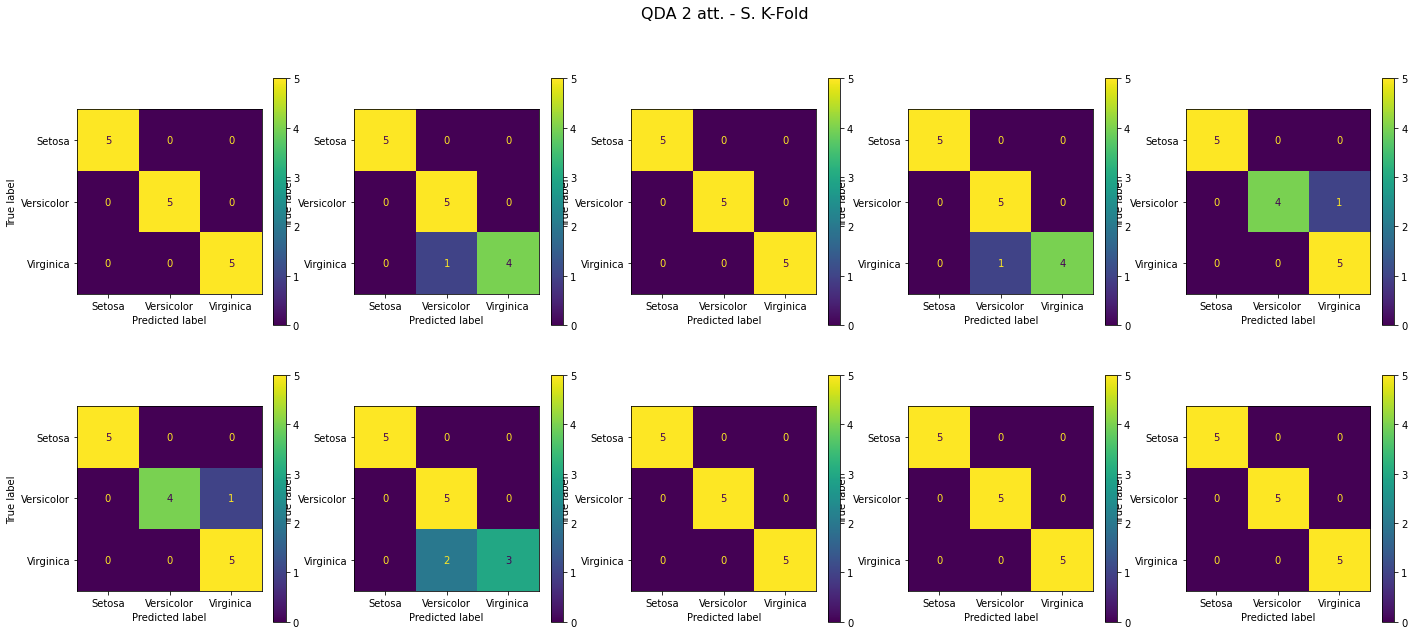

In [ ]:
plot_all_confusion(accQDAKF2t['confusion'], "QDA 2 att. - S. K-Fold" )

Ao utilizar dois atributos, o QDA acaba confundido mais entre Versicolor e Virginica.

#### GNB

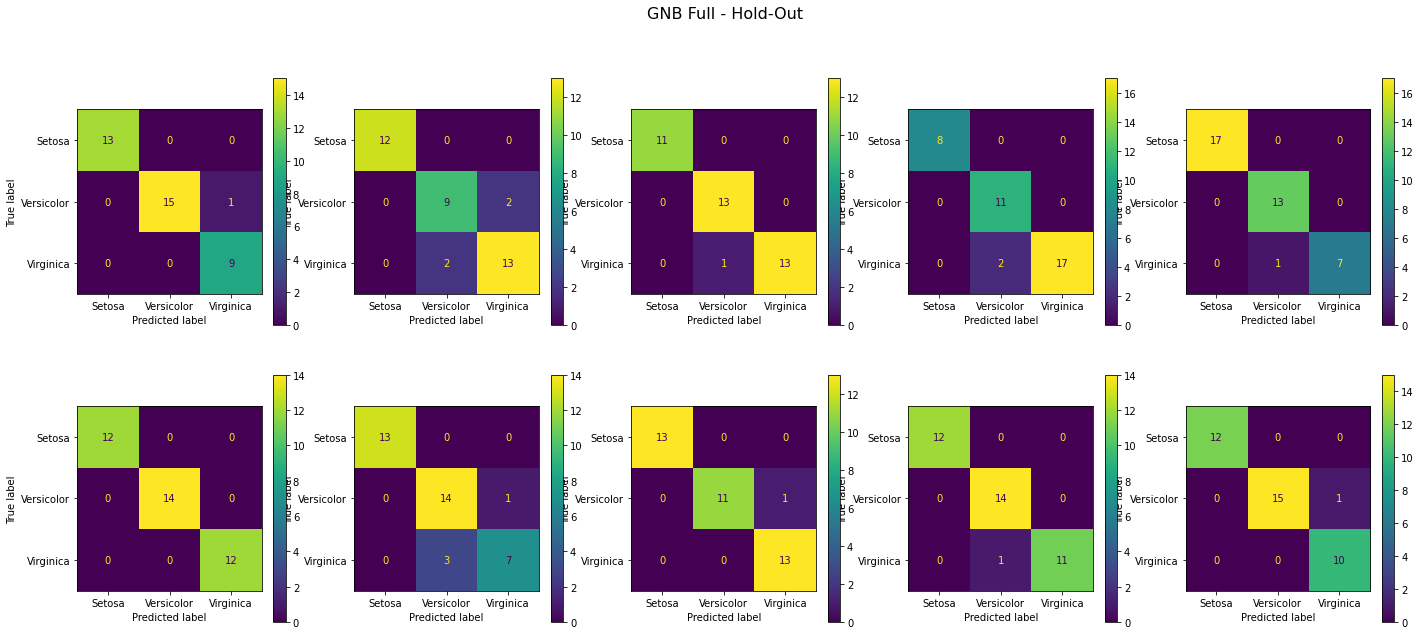

In [ ]:
plot_all_confusion(accGNBHO['confusion'], "GNB Full - Hold-Out" )

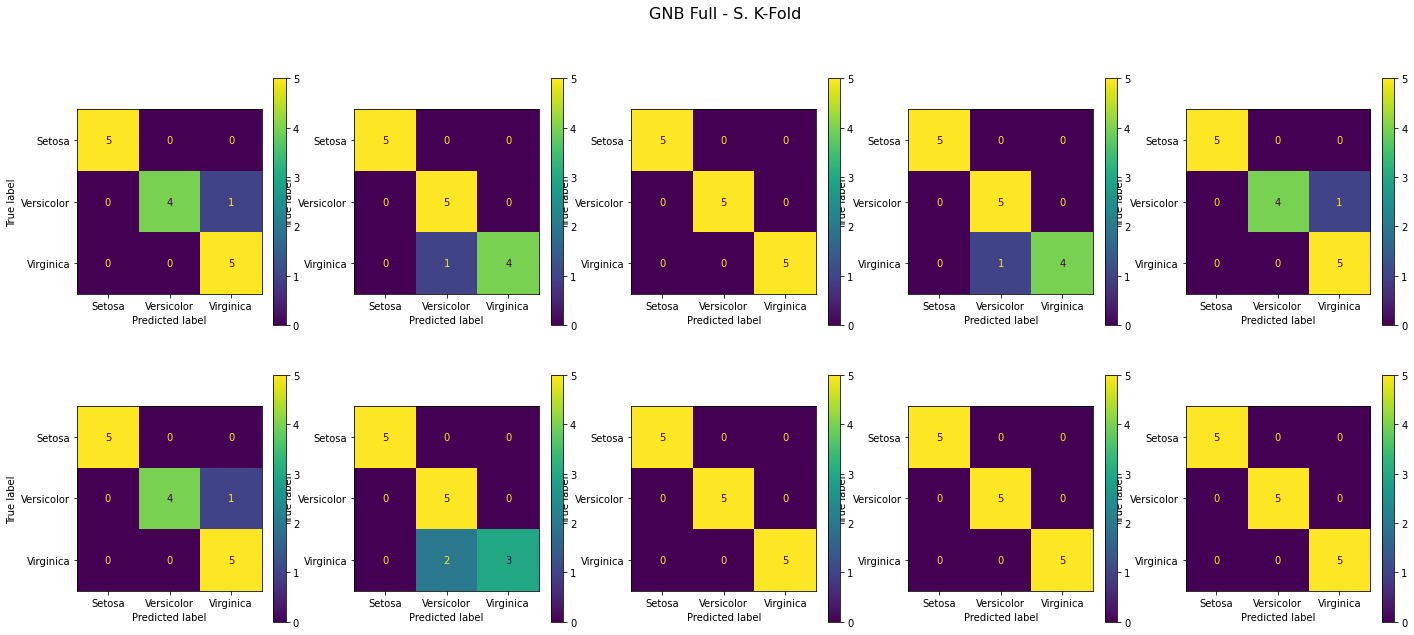

In [ ]:
plot_all_confusion(accGNBKF['confusion'], "GNB Full - S. K-Fold" )

No caso do GNB, ocorreram mais erros ao classificar algumas elementos da classe Virginica como Versicolor

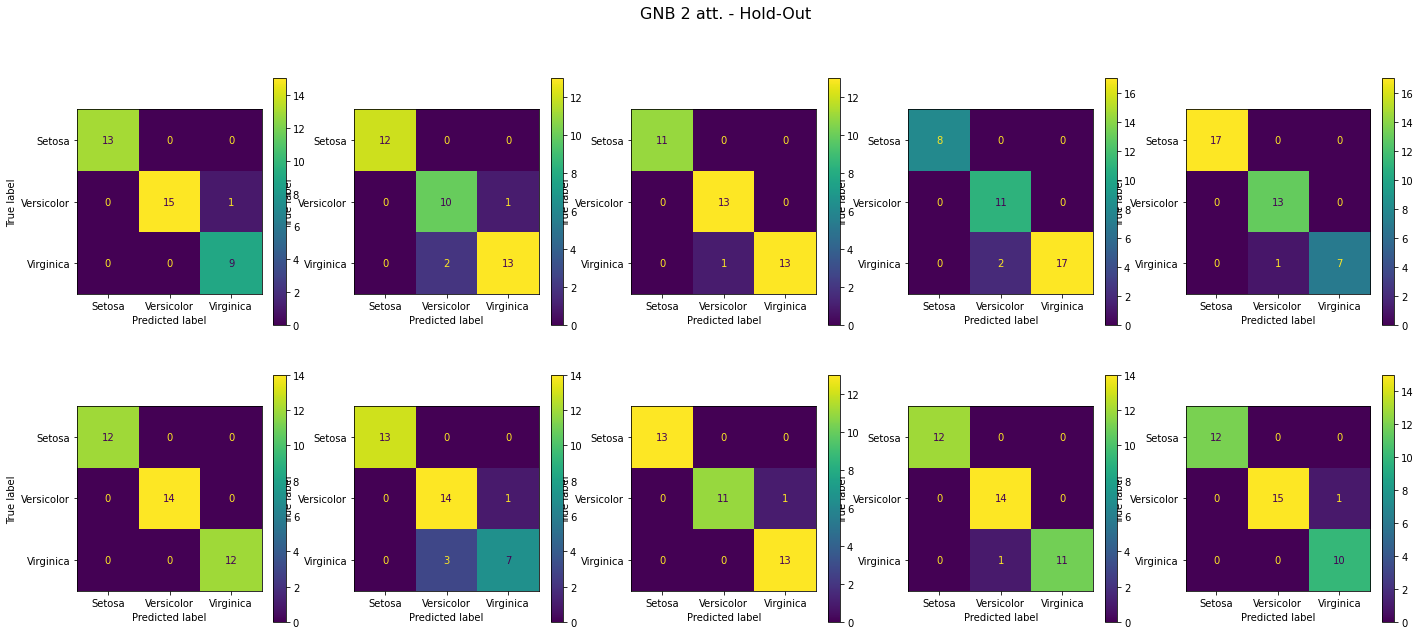

In [ ]:
plot_all_confusion(accGNBHO2t['confusion'], "GNB 2 att. - Hold-Out" )

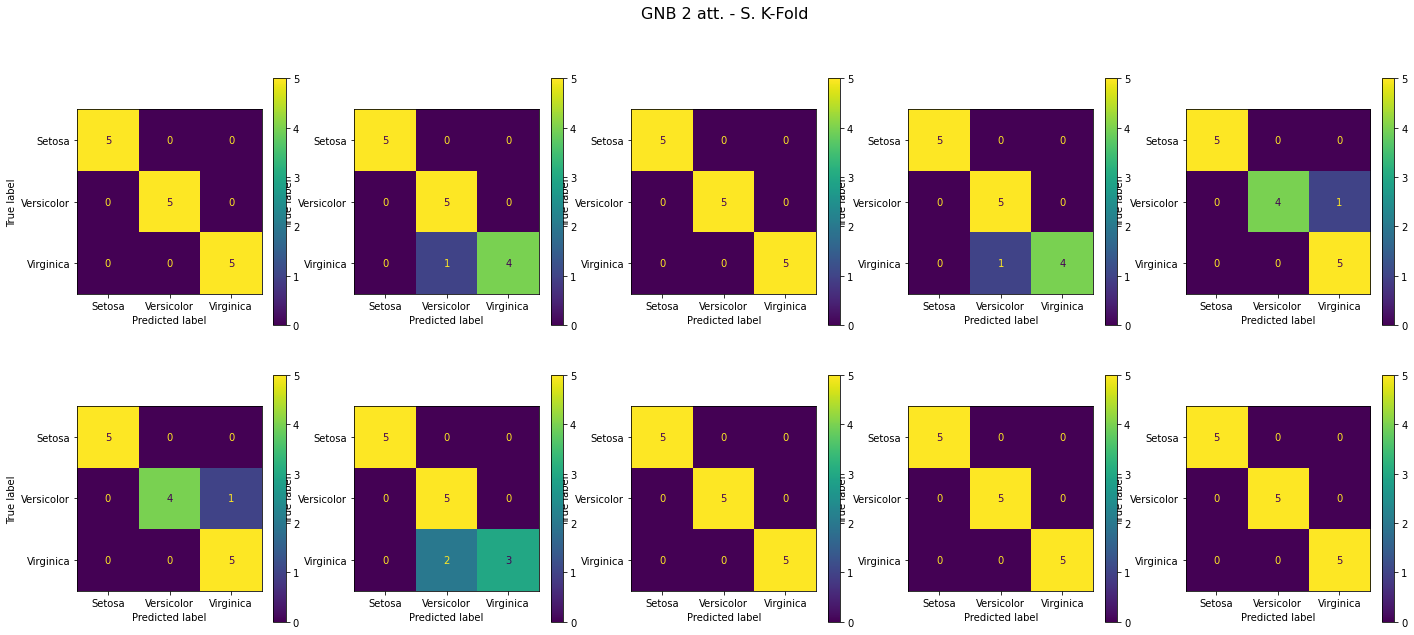

In [ ]:
plot_all_confusion(accGNBKF2t['confusion'], "GNB 2 att. - S. K-Fold" )

Com dois atributos, o muda pouco sua taxa de acerto.

## Conclusão

In [ ]:
resultDF[["LDA-f/K.F.", "QDA-f/K.F."]].describe()

,LDA-f/K.F.,QDA-f/K.F.
count,10.000000,10.000000
mean,0.980000,0.980000
std,0.044997,0.044997
min,0.866667,0.866667
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Acurácia Média de ambos: 0.98

O treinamento de índice 4 possui acurácia mais próxima para ambos os classificadores.

In [ ]:
resultDF[["LDA-f/K.F.", "QDA-f/K.F."]]

,LDA-f/K.F.,QDA-f/K.F.
0,1.000000,1.000000
1,1.000000,1.000000
2,1.000000,1.000000
3,1.000000,1.000000
4,0.933333,0.933333
5,1.000000,1.000000
6,0.866667,0.866667
7,1.000000,1.000000
8,1.000000,1.000000
9,1.000000,1.000000


lda score: 0.9333333333333333
qda score:  0.9333333333333333


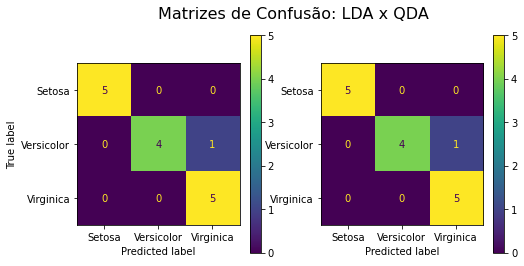

In [ ]:
# Utilizando teste/treino 4
ldaF = LinearDiscriminantAnalysis(store_covariance=True)
qdaF = QuadraticDiscriminantAnalysis(store_covariance=True)

X_train = dataKFold["X_train"][4]
Y_train = dataKFold["Y_train"][4]
X_test = dataKFold["X_test"][4]
Y_test = dataKFold["Y_test"][4]

ldaPredictF = ldaF.fit(X_train, Y_train).predict(X_test)
qdaPredictF = qdaF.fit(X_train, Y_train).predict(X_test)

print("lda score:", ldaF.score(X_test, Y_test))
print("qda score: ", ldaF.score(X_test, Y_test))

fig, axs = plt.subplots(1,2, figsize=(8, 4))

cm1 = ConfusionMatrixDisplay(
    confusion_matrix(Y_test, ldaPredictF), display_labels=LABELS)
cm1.plot(ax=axs[0])

cm2 = ConfusionMatrixDisplay(
    confusion_matrix(Y_test, qdaPredictF), display_labels=LABELS)
cm2.plot(ax=axs[1])

fig.suptitle("Matrizes de Confusão: LDA x QDA", fontsize=16)
plt.show()

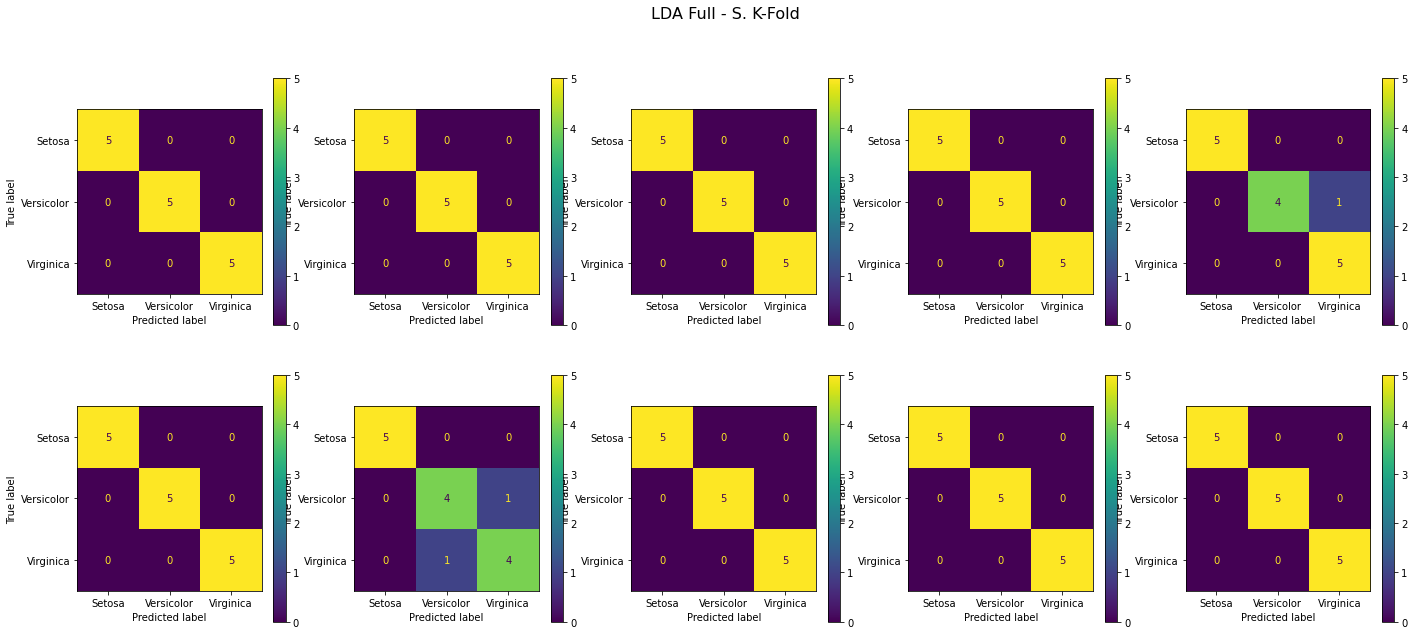

In [ ]:
plot_all_confusion(accLDAKF['confusion'], "LDA Full - S. K-Fold" )

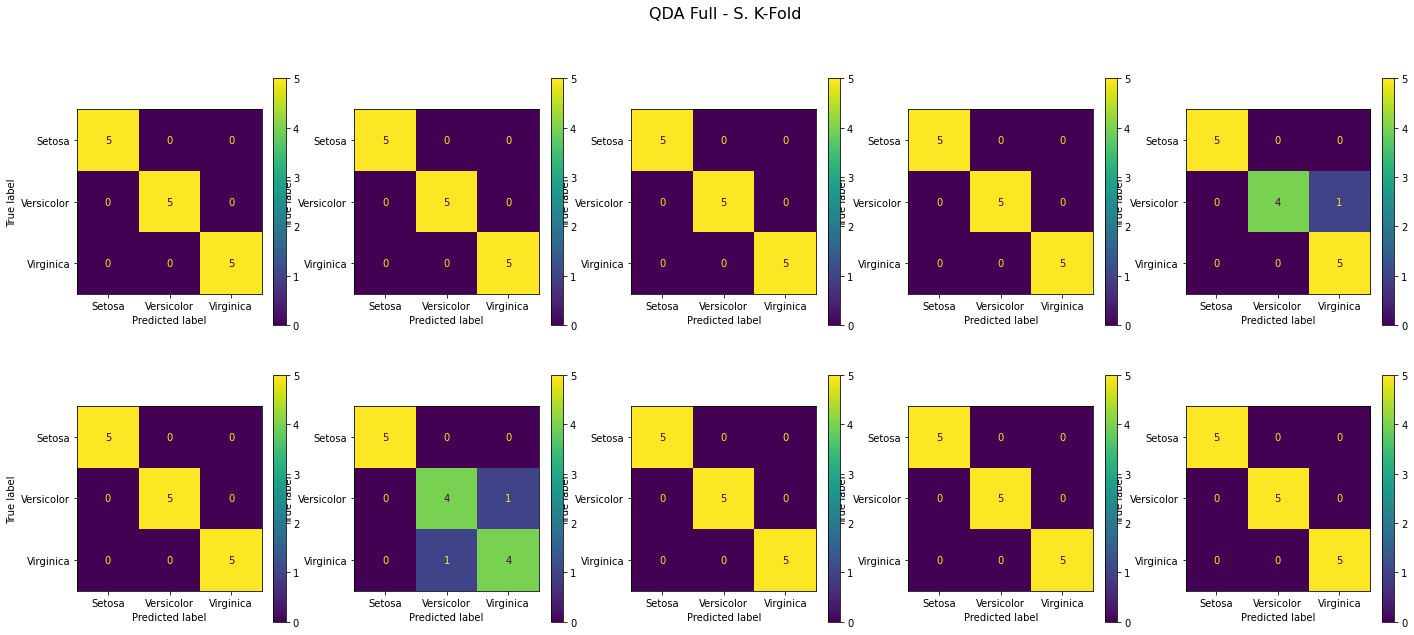

In [ ]:
plot_all_confusion(accQDAKF['confusion'], "QDA Full - S. K-Fold" )

Os valores de acurácia média, desvio padrão, e as matrizes de confusão de ambos os classificadores, para Stratified K-Fold, foram idênticas.

Então avaliou-se também os dados e matrizes do Hold-Out para critérios de desempate. 



Os resultados do LDA e QDA, utilizando quatro atributos, foram melhores do que utilizando dois atributos. Então, optou-se por utilizar todos os quatro atributos.

Com quatro atributos, os resultados foram similares no *Hold-Out* e praticamente iguais na validação *Stratified K-Folds*:


*   Acurácia Média: 0.980000
*   Desvio Padrão: 0.042687	

**Classificador escolhido:** *LDA*

**Motivo:** Levando em conta apenas a validação *Stratified K-Folds*, a escolha do *LDA* se deve por sua simplicidade. Ao levar em conta também os resultados da validação *Hold-Out*, o *LDA* é escolhido por apresentar menor desvio-padrão (0.013158) e maior acurácia média (0.984211).

# Referências:

https://datacadamia.com/data_mining/linear_discriminant_analysis_multiple

https://datacadamia.com/data_mining/discriminant_analysis_quadratic

https://datacadamia.com/data_mining/naive_bayes

https://scikit-learn.org/stable/modules/lda_qda.html

https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

